In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
# import hdbscan

In [4]:
# importing dataset
data = pd.read_csv("glass.csv")
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data.drop(['Id'],axis=1,inplace=True)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
data.shape

(214, 10)

In [8]:
x = data.iloc[:,[0,1,2,3,4,5,6,7,8]].values
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

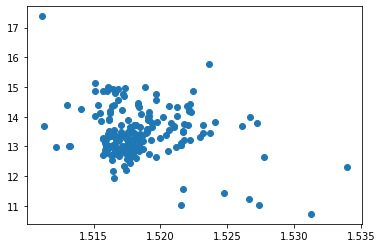

In [9]:
plt.scatter(x[:,0],x[:,1])

In [11]:
dbscan = DBSCAN(eps=0.9,min_samples=12)
dbscan.fit(x)
labels = dbscan.fit_predict(x)
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

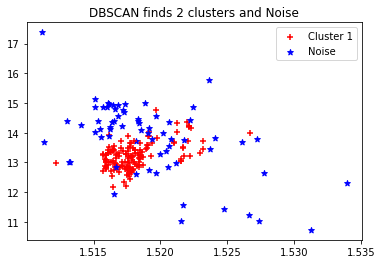

In [12]:
for i in range(0, x.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(x[i, 0], x[i, 1], c='red', marker='+')
    # elif dbscan.labels_[i] == 1:
    #     c2 = plt.scatter(x[i, 0], x[i, 1], c='green', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(x[i, 0], x[i, 1], c='blue', marker='*')
    # elif dbscan.labels_[i] == 2:
    #     c4 = plt.scatter(x[i,0],x[i,1],c='orange',marker='^')
    # elif dbscan.labels_[i] == 3:
    #     c5 = plt.scatter(x[i,0],x[i,1],c='yellow',marker='>')
    # elif dbscan.labels_[i] == 4:
    #     c5 = plt.scatter(x[i,0],x[i,1],c='brown',marker='<')
    # elif dbscan.labels_[i] == 5:
    #     c5 = plt.scatter(x[i,0],x[i,1],c='purple',marker='d')
    # elif dbscan.labels_[i] == 6:
    #     c5 = plt.scatter(x[i,0],x[i,1],c='black',marker='.')


plt.legend([c1,c3], ['Cluster 1', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

In [13]:
print("Silhouette Coefficient      : %0.3f" % silhouette_score(x, labels))

Silhouette Coefficient      : 0.500


In [14]:
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
agg_clustering.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [15]:
labels = agg_clustering.fit_predict(x)

In [16]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

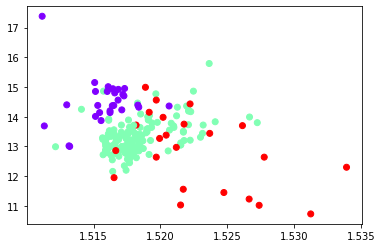

In [17]:
plt.scatter(x[:,0],x[:,1],c=labels,cmap='rainbow')

In [18]:
print("Silhouette Coefficient      : %0.3f" % silhouette_score(x, labels))

Silhouette Coefficient      : 0.584


Clustering on Glass Dataset.
* Using DBSCAN algorithm.
  * Considering epsilon = 0.9 and minimum sample = 12
  * Clusters obtained is 1 along with Noise.
  * Silhouette coefficient is 0.5
* Using Agglomerative Clustering algorithm.
  * Clusters fromed are 3.
  * Silhouette Coefficient is 0.584